In [26]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS


In [27]:
sys.path.append(os.path.abspath('../data'))

In [28]:


df = pd.read_csv("../data/InstagramData.csv", encoding = 'latin1')
(df.head())

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [29]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [30]:
df = df.dropna()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_16040\3349444010.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




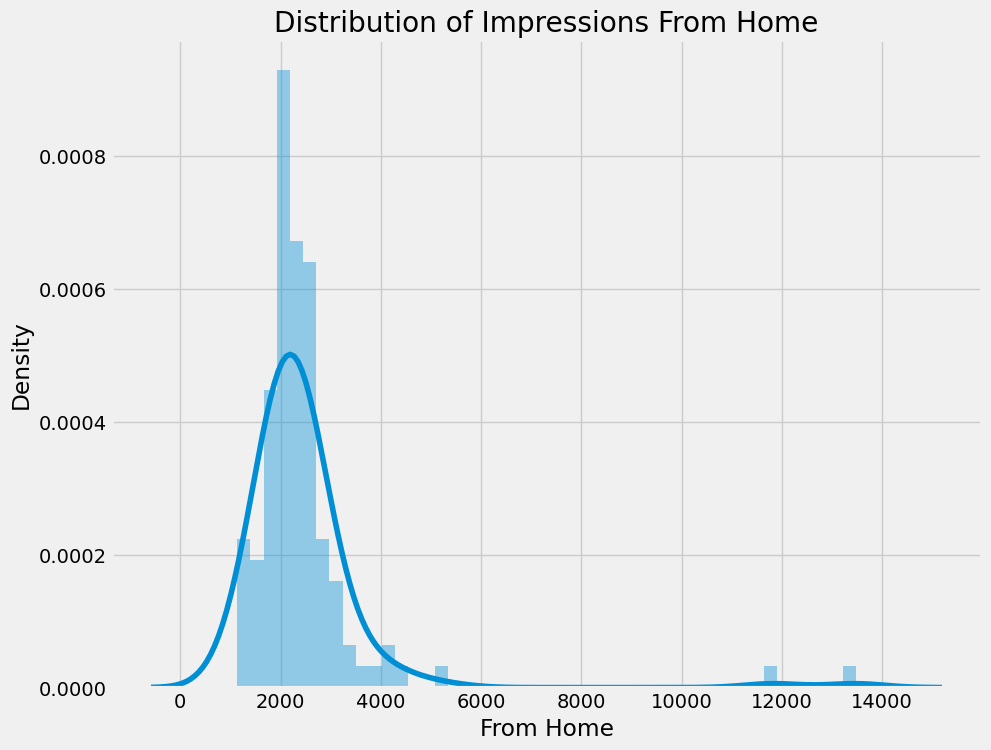

In [32]:
plt.figure(figsize = (10, 8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of Impressions From Home")
sns.distplot(df["From Home"])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16040\81263985.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




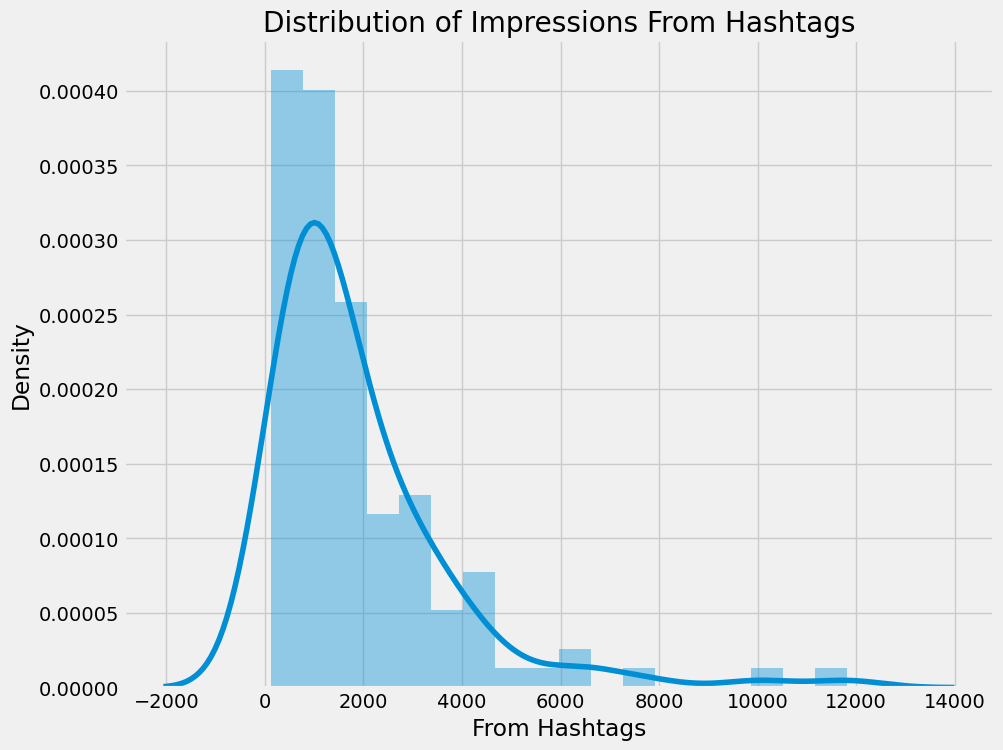

In [33]:
plt.figure(figsize = (10, 8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(df["From Hashtags"])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16040\809455062.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




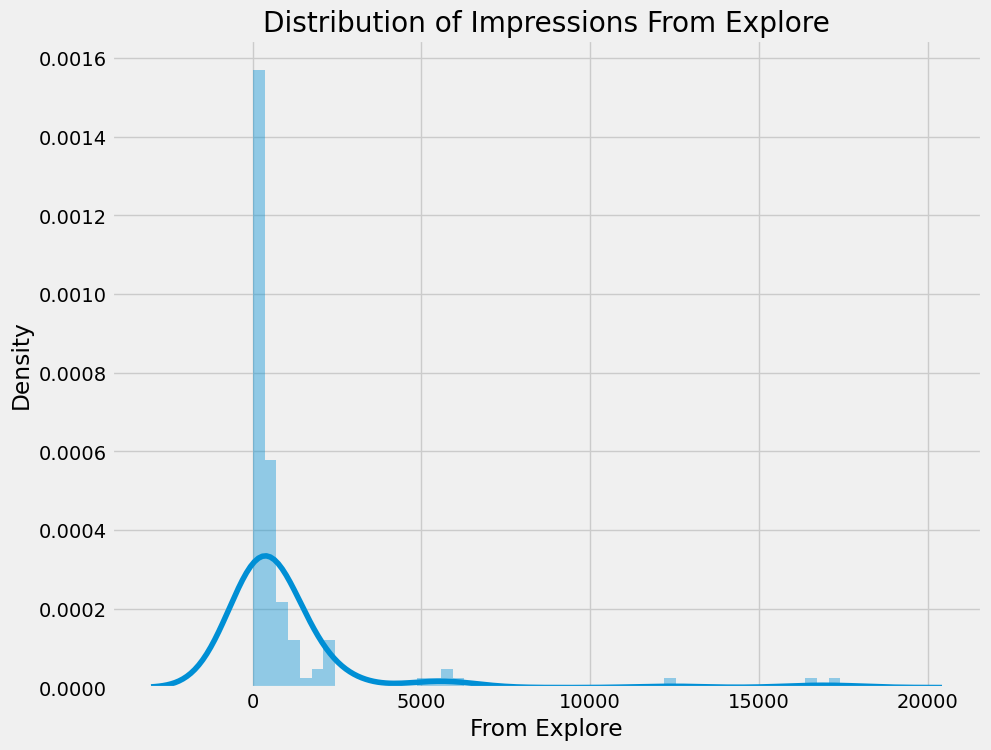

In [34]:
plt.figure(figsize= (10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(df["From Explore"])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16040\3225056383.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




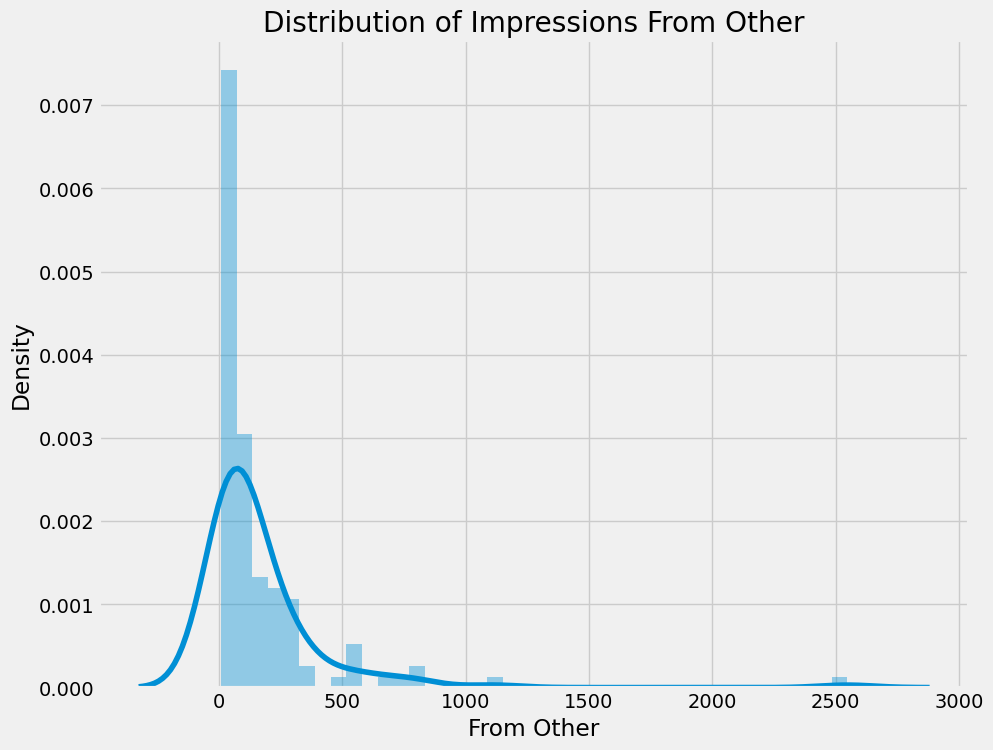

In [35]:
plt.figure(figsize= (10, 8))
plt.title("Distribution of Impressions From Other")
sns.distplot(df["From Other"])
plt.show()

In [36]:
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
others = df["From Other"].sum()

labels = ["From Home", "From Hashtags", "From Explore", "From Others"]
values = [home, hashtags, explore, others]

fig = px.pie(df, values= values, names= labels, title= "Impressions From Instagram Posts")
fig.show()

In [37]:
figure = px.scatter(data_frame= df, x= "Impressions", y = "Likes", size= "Likes",
                    trendline= "ols", 
                    title= "Relationship Between Likes and Impressions")
figure.show()
# This code creates a scatter plot using Plotly Express to visualize the relationship between 'Impressions' and 'Likes' in the dataset.
# The size of each point represents the number of 'Likes', and a trendline (ordinary least squares regression) is added to show the correlation.

In [38]:
figure_two = px.scatter(data_frame= df, x= "Impressions", y = "Comments", size= "Comments",
                    trendline= "ols", 
                    title= "Relationship Between Likes and Comments")
figure_two.show()

In [39]:
figure_three = px.scatter(data_frame= df, x= "Impressions", y = "Shares", size= "Shares",
                    trendline= "ols", 
                    title= "Relationship Between Likes and Shares")
figure_three.show()

In [40]:
figure_four = px.scatter(data_frame= df, x= "Impressions", y = "Saves", size= "Saves",
                    trendline= "ols", 
                    title= "Relationship Between Likes and Saves")
figure_four.show()

In [41]:

df_2 = df.copy()
columns = ['Caption', 'Hashtags']
df_2 = df_2.drop(columns, axis=1)
correlation = df_2.corr()
corre = correlation["Impressions"].sort_values(ascending= False)
print(corre)


Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [42]:
def conversion_rate():
    """in instagram conversion Rate means how mnay followers you get
        from the number of profile visits from a post
    """
    conversion_rate= (df["Follows"].sum() / df["Profile Visits"].sum()) *100
    print(conversion_rate)

In [43]:
conversion_rate()

41.00265604249668


Conversion rate tells us that little over 40% of users that visit the account profile from a post, end up following the account

In [44]:
figure_four = px.scatter(data_frame= df, x= "Profile Visits", y = "Follows", 
                         size= "Follows",
                    trendline= "ols", 
                    title= "Relationship Between Profile Visits and Follows")
figure_four.show()